In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics

In [153]:
df = pd.read_csv("Close_Return_SPY.csv")

In [154]:
# Dropping Classification Label and adding Month of the year feature
df = df.drop("1_up_0_down", axis = 1)
df["month"]=pd.to_datetime(df["Date"]).apply(lambda date:date.month)
df = df.set_index("Date")

In [155]:
# checking for nulls
df.isnull().sum().sum()

0

In [156]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AUDUSD,1157.0,0.775025,0.142401,0.484700,0.701800,0.757700,0.878200,1.099500
EURODOLLAR,1157.0,98.148157,1.834885,93.060000,97.350000,98.800000,99.690000,99.882000
EURUSD,1157.0,1.205647,0.158457,0.838600,1.114400,1.206700,1.322200,1.594200
CRUDE,1157.0,62.058401,25.819557,16.940000,41.250000,59.240000,81.430000,145.290000
COPPER,1157.0,2.592371,1.118287,0.612000,1.625000,2.833000,3.378000,4.937500
...,...,...,...,...,...,...,...,...
BAA_5W-10WR,1157.0,0.001623,0.046929,-0.298374,-0.019048,0.006086,0.025769,0.209045
AAA_5W-10WR,1157.0,0.002156,0.053034,-0.188260,-0.022786,0.005374,0.030257,0.384521
SPY_5W-10WR,1157.0,-0.006072,0.052540,-0.254620,-0.034745,-0.012899,0.016840,0.398576
OUTPUT,1157.0,0.001181,0.024792,-0.197934,-0.009934,0.002280,0.013947,0.132923


In [157]:
df.head()

,AUDUSD,EURODOLLAR,EURUSD,CRUDE,COPPER,VIX,GOLD,EWJ,EWH,EWG,...,USDCHF_5W-10WR,US10Y_5W-10WR,SILVER_5W-10WR,MOR30Y_5W-10WR,MOR15Y_5W-10WR,BAA_5W-10WR,AAA_5W-10WR,SPY_5W-10WR,OUTPUT,month
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-17,0.6068,93.63,0.9724,30.91,0.805,22.37,284.1,60.00,13.56,28.00,...,-0.040080,-0.011844,-0.033749,-0.025397,-0.029268,-0.006170,0.005215,0.051321,0.045052,3
2000-03-24,0.6083,93.64,0.9771,28.02,0.804,23.31,284.7,59.75,13.81,28.44,...,-0.021629,0.029271,-0.030575,-0.024012,-0.027712,0.005967,0.012671,0.090036,-0.020709,3
2000-03-31,0.6076,93.66,0.9562,26.90,0.800,24.11,278.4,66.00,13.69,27.00,...,-0.034187,0.060839,0.035505,-0.005995,-0.007556,0.017880,0.026511,0.086754,0.007049,3
2000-04-07,0.5985,93.69,0.9549,25.04,0.765,24.39,279.8,63.75,13.50,26.56,...,-0.014284,0.038397,0.039232,-0.002404,0.000000,-0.007194,0.002544,-0.041384,-0.101955,4
2000-04-14,0.5976,93.71,0.9623,25.57,0.751,33.49,282.6,60.50,12.06,25.06,...,-0.022034,0.023924,0.088759,0.002392,0.005063,-0.019395,-0.010309,0.016813,0.057426,4


<AxesSubplot:xlabel='OUTPUT', ylabel='Count'>

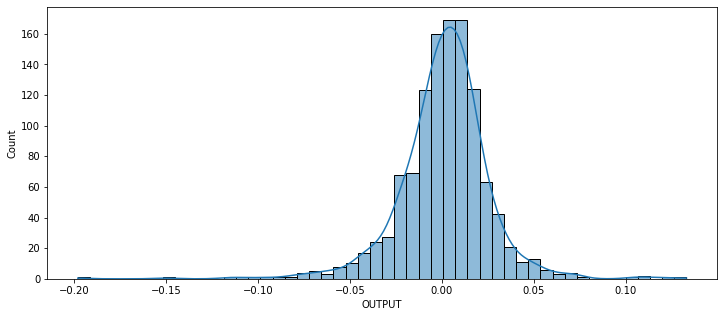

In [158]:
# distribution of the output label... looks skew left.
plt.figure(figsize=(12,5))
sns.histplot(x = "OUTPUT", data = df, kde = True, bins = 50)

In [159]:
# abs correlation of top correlated to output
abs(df.corr()["OUTPUT"]).nlargest(5)

OUTPUT         1.000000
VIX_3W-10WR    0.084216
MOR30Y         0.084186
VIX_1W-3WR     0.084077
MOR15Y         0.081872
Name: OUTPUT, dtype: float64

In [160]:
# top correlated to output
abs(df.corr()["OUTPUT"]).nlargest(5).index

Index(['OUTPUT', 'VIX_3W-10WR', 'MOR30Y', 'VIX_1W-3WR', 'MOR15Y'], dtype='object')

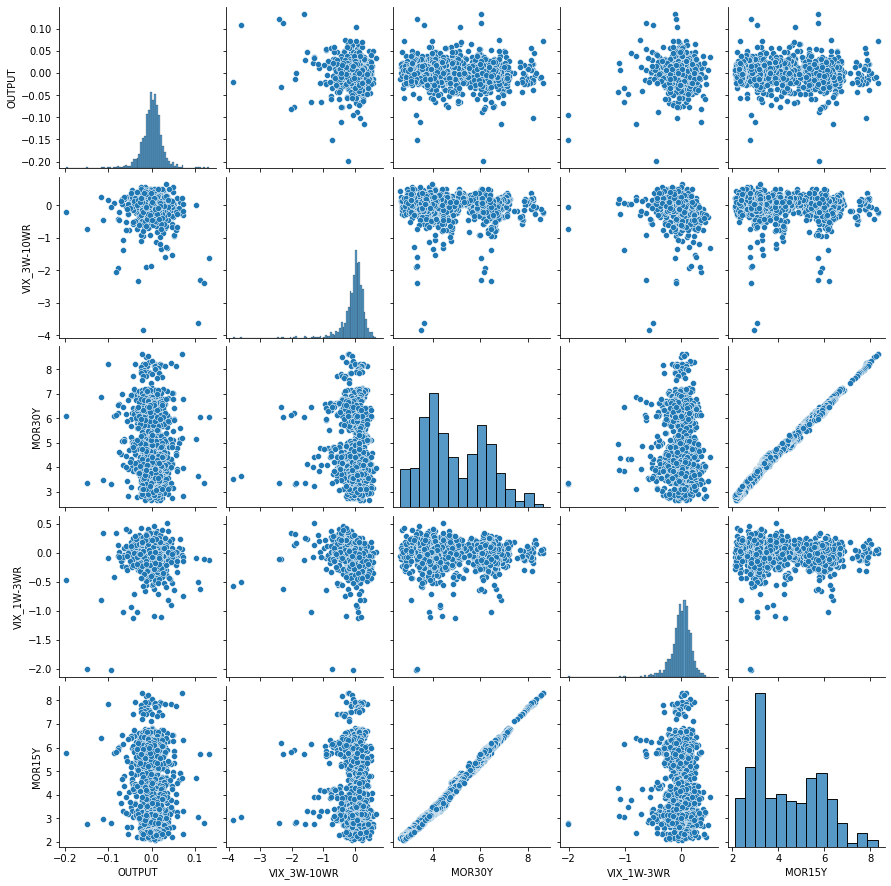

In [161]:
sns.pairplot(df[abs(df.corr()["OUTPUT"]).nlargest(5).index])

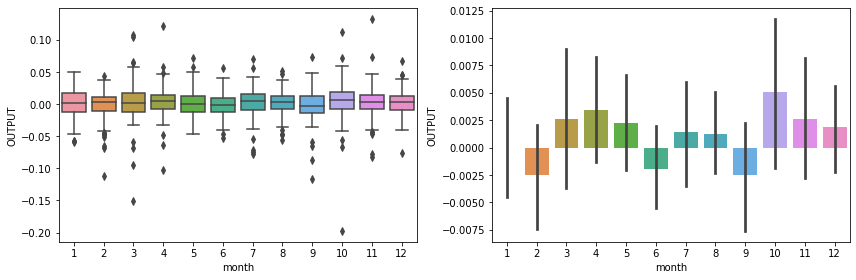

In [162]:
# month of year plot for weekly returns
fig, axes = plt.subplots(ncols = 2, figsize = (12,4))
sns.boxplot(ax = axes[0],x = "month", y = "OUTPUT", data = df)
sns.barplot(ax = axes[1],x = "month", y = "OUTPUT", data = df)
plt.tight_layout()

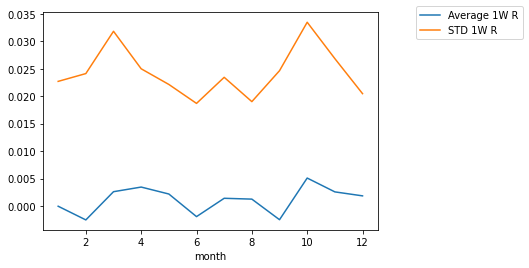

In [163]:
# Comparing avg SD and R for month of year
df.groupby("month")["OUTPUT"].mean().plot(label = "Average 1W R")
df.groupby("month")["OUTPUT"].std().plot(label = "STD 1W R")
plt.legend(loc="upper right")
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [164]:
# month of the year correlation with avg weekly returns and sd
print("Month and R:",st.pearsonr(sorted(set(df["month"].unique())),df.groupby("month")["OUTPUT"].mean()))
print("Month and SD:",st.pearsonr(sorted(set(df["month"].unique())),df.groupby("month")["OUTPUT"].std()))

Month and R: (0.286426091257184, 0.3667531300072326)
Month and SD: (0.013908172430067145, 0.9657816831133885)


In [272]:
# Preprocessing Data
X = df.drop("OUTPUT",axis = 1).values
y = df["OUTPUT"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [273]:
X_train.shape

(867, 232)

In [274]:
# Creating our Model: DLM1 - without early stopping or layer dropout
model = Sequential()

model.add(Dense(20,activation = "relu"))
model.add(Dense(20,activation = "relu"))
model.add(Dropout(.5))
model.add(Dense(20,activation = "relu"))

model.add(Dense(1))
model.compile(optimizer = "adam", loss = "mse")
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 50)

In [275]:
# Training DLM1
model.fit(x = X_train, y = y_train, epochs = 600,validation_data = (X_test,y_test), callbacks = [early_stop], batch_size = 80)

Epoch 1/600
11/11 [==============================] - 1s 15ms/step - loss: 0.3500 - val_loss: 0.0021
Epoch 2/600
11/11 [==============================] - 0s 7ms/step - loss: 0.0222 - val_loss: 0.0014
Epoch 3/600
11/11 [==============================] - 0s 6ms/step - loss: 0.0091 - val_loss: 0.0024
Epoch 4/600
11/11 [==============================] - 0s 8ms/step - loss: 0.0053 - val_loss: 0.0013
Epoch 5/600
11/11 [==============================] - 0s 8ms/step - loss: 0.0036 - val_loss: 0.0014
Epoch 6/600
11/11 [==============================] - 0s 8ms/step - loss: 0.0027 - val_loss: 0.0013
Epoch 7/600
11/11 [==============================] - 0s 5ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 8/600
11/11 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 9/600
11/11 [==============================] - 0s 5ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 10/600
11/11 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 9.7609e-04
Epoc

Epoch 78/600
11/11 [==============================] - 0s 5ms/step - loss: 6.2534e-04 - val_loss: 6.6536e-04
Epoch 79/600
11/11 [==============================] - 0s 5ms/step - loss: 6.2159e-04 - val_loss: 6.5985e-04
Epoch 80/600
11/11 [==============================] - 0s 5ms/step - loss: 6.2182e-04 - val_loss: 6.5917e-04
Epoch 81/600
11/11 [==============================] - 0s 5ms/step - loss: 6.1845e-04 - val_loss: 6.6432e-04
Epoch 82/600
11/11 [==============================] - 0s 5ms/step - loss: 6.0744e-04 - val_loss: 6.6921e-04
Epoch 83/600
11/11 [==============================] - 0s 5ms/step - loss: 6.1164e-04 - val_loss: 6.5929e-04
Epoch 84/600
11/11 [==============================] - 0s 5ms/step - loss: 6.0999e-04 - val_loss: 6.5991e-04
Epoch 85/600
11/11 [==============================] - 0s 5ms/step - loss: 6.0997e-04 - val_loss: 6.5669e-04
Epoch 86/600
11/11 [==============================] - 0s 5ms/step - loss: 6.1532e-04 - val_loss: 6.5487e-04
Epoch 87/600
11/11 [========

11/11 [==============================] - 0s 5ms/step - loss: 5.9843e-04 - val_loss: 6.4998e-04
Epoch 154/600
11/11 [==============================] - 0s 5ms/step - loss: 5.9889e-04 - val_loss: 6.5059e-04
Epoch 155/600
11/11 [==============================] - 0s 5ms/step - loss: 5.9854e-04 - val_loss: 6.5109e-04
Epoch 156/600
11/11 [==============================] - 0s 6ms/step - loss: 6.0678e-04 - val_loss: 6.4917e-04
Epoch 157/600
11/11 [==============================] - 0s 5ms/step - loss: 5.9589e-04 - val_loss: 6.5110e-04
Epoch 158/600
11/11 [==============================] - 0s 6ms/step - loss: 5.9442e-04 - val_loss: 6.5177e-04
Epoch 159/600
11/11 [==============================] - 0s 6ms/step - loss: 6.0327e-04 - val_loss: 6.5323e-04
Epoch 160/600
11/11 [==============================] - 0s 5ms/step - loss: 5.9575e-04 - val_loss: 6.5780e-04
Epoch 161/600
11/11 [==============================] - 0s 6ms/step - loss: 5.9956e-04 - val_loss: 6.5919e-04
Epoch 162/600
11/11 [============

11/11 [==============================] - 0s 6ms/step - loss: 5.7808e-04 - val_loss: 6.5217e-04
Epoch 229/600
11/11 [==============================] - 0s 4ms/step - loss: 5.8333e-04 - val_loss: 6.5170e-04
Epoch 230/600
11/11 [==============================] - 0s 6ms/step - loss: 5.7861e-04 - val_loss: 6.5283e-04
Epoch 231/600
11/11 [==============================] - 0s 5ms/step - loss: 5.6985e-04 - val_loss: 6.5462e-04
Epoch 232/600
11/11 [==============================] - 0s 5ms/step - loss: 5.9998e-04 - val_loss: 6.5215e-04
Epoch 233/600
11/11 [==============================] - 0s 5ms/step - loss: 5.8757e-04 - val_loss: 6.5167e-04
Epoch 234/600
11/11 [==============================] - 0s 6ms/step - loss: 5.9295e-04 - val_loss: 6.4808e-04
Epoch 235/600
11/11 [==============================] - 0s 5ms/step - loss: 5.8793e-04 - val_loss: 6.4585e-04
Epoch 235: early stopping


<AxesSubplot:>

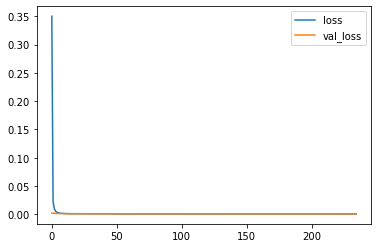

In [276]:
# Overfitting?
pd.DataFrame(model.history.history).plot()

In [277]:
# Evaluating DLM1
predictions = model.predict(X_test)
print("MSE:",metrics.mean_squared_error (y_test,predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error (y_test,predictions)))
print("RRMSE:",np.sqrt(metrics.mean_squared_error (y_test,predictions))/abs(df["OUTPUT"]).mean())
print("MAE:", metrics.mean_absolute_error (y_test, predictions))
print("RMAE:", metrics.mean_absolute_error (y_test, predictions)/abs(df["OUTPUT"]).mean())
print("EV:", metrics.explained_variance_score(y_test,predictions))

10/10 [==============================] - 0s 2ms/step
MSE: 0.000645847207589384
RMSE: 0.025413524108029252
RRMSE: 1.4849369212624144
MAE: 0.017674969655937105
RMAE: 1.032765661020681
EV: 0.009345093059650145


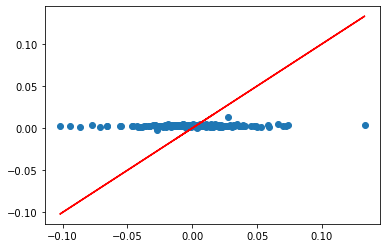

In [278]:
# DLM1 Performance
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,"r")